# TP K-Means

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

## Load iris dataset
Load the iris dataset samples, but don't use the labels (do as if this dataset was not labeled).
Only use the following features:
* Petal width
* Sepal length
* Petal length

In [13]:
iris = datasets.load_iris()
X_all = iris.data
y = iris.target

print(y.shape)
print(np.unique(y))

SEPAL_LENGTH = 0
PETAL_LENGTH = 2
PETAL_WIDTH = 3
X = X_all[:, [SEPAL_LENGTH, PETAL_WIDTH, PETAL_LENGTH]]

(150,)
[0 1 2]


## Plot clustering on 3 dimensions

In [4]:
def plot_3d(X, y):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)

    plt.cla()

    ax.scatter(X[:, 2], X[:, 0], X[:, 1], c=y.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')

## Find the best number of centroids
Use the "Elbow" method to find the best number of centroids

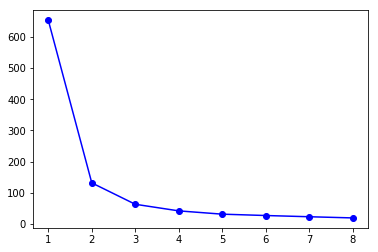

In [5]:
ks = range(1, 9)
inertias = []

for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    inertias.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(ks, inertias, '-bo')

## Q6: Based on the "Elbow" method, what is the optimal number of centroids? How did you determine it?

From Wiki:

The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

Between 2, 3 is difficult to choose, in first instance i pick 2 cluster. But of course, in the y.shape we have 3 classes, so 3 seem to be the beter choice ...  :-)

## Correct number of centroids
Configure the estimator with the correct number of centroids

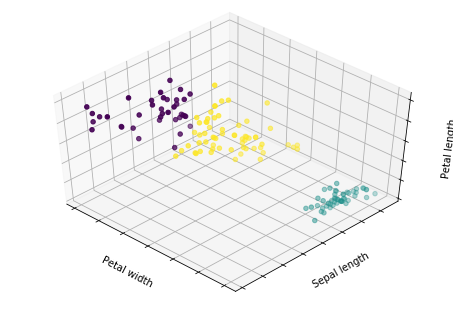

In [14]:
k = 3
kmeans = KMeans(n_clusters=k).fit(X)
y_pred = kmeans.predict(X)
plot_3d(X, y_pred)

## Bad initialization
Configure the estimator with the correct number of centroids, but with a bad initialization configuration. Try to reduce the amount of times (default is 10) that the algorithm will be run with different centroid seeds.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


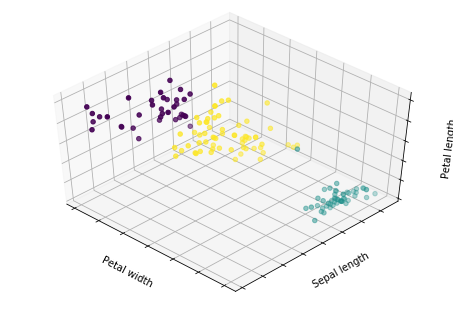

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=1, max_iter=1).fit(X)
print(kmeans)
y_pred = kmeans.predict(X)
plot_3d(X, y_pred)

## Q7: What incidence has a bad initialization?

n_init: Number of cycle for this algorithm

max_iter: Number of iteration for one cycle

Somme point are missfited (one blue in yellow group, 2 yellow in purple group)


## Wrong number of centroids
Configure the estimator with the wrong number of centroids (too much for instance)

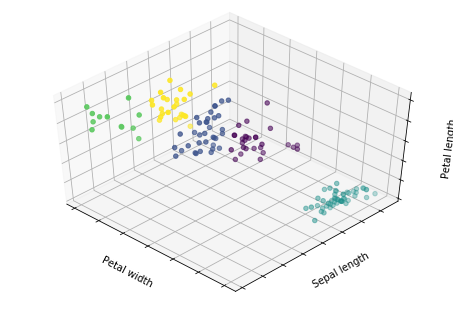

In [8]:
k = 5
kmeans = KMeans(n_clusters=k).fit(X)
y_pred = kmeans.predict(X)
plot_3d(X, y_pred)

## Q7: What incidence has a wrong number of centroids?

The real number of classes is 3, one of them is strongly separated. So, the 2 other are splitted to 4 ...

# Optional: Color quantization

Load an image and show it

# TODO

Sorry, not enought time ...  next time ...

Transform the image to a 2D numpy array

In [ ]:
# TODO

Fitting model on a small sub-sample of the data

In [ ]:
# TODO

Get labels (color indices) for all points

In [ ]:
# TODO

Plot the resulting image after color quantization

In [10]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0

    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]] / 255.
            label_idx += 1
            
    return image

In [ ]:
# TODO